In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.mode.chained_assignment = None
from IPython.display import Image

In [20]:
path = r"CBS.csv"

data = pd.read_csv(path,sep=';',skiprows=[0, 1, 2, 3 ],header=[0, 1, 2],index_col=[0])
data = data.replace(',', '.', regex=True)

data = data.dropna(thresh=data.shape[1] - 1)
data = data.drop('Unnamed: 1_level_0',axis=1,level=0)
data.index = data.index.str.replace('*', '', regex=False)


In [21]:
# Define translations for column names
column_translations = {
    'index': 'Year',
    'Reismotieven': 'Travel motive',
    'aantal': 'Count',
    'km': 'Distance in km',
    'Minuten': 'Minutes',
    'snelheid': 'Speed in kmh'
}

# Define translations for travel motives
travel_motive_translations = {
    'Van en naar het werk': 'Commuting to and from work',
    'Vrije tijd': 'Free time',
    'Winkelen. boodschappen doen': 'Groceries and shopping',
    'Onderwijs volgen. cursus. kinderopvang': 'Education',
    'Totaal': 'Total',
    'Overige reismotieven': 'Other'
}

# Define the data subsets
total = data.iloc[:, [0, 1, 2, 3]]
driver = data.iloc[:, [0, 4, 5, 6]]
passenger = data.iloc[:, [0, 7, 8, 9]]
train = data.iloc[:, [0, 10, 11, 12]]
btm = data.iloc[:, [0, 13, 14, 15]]
bike = data.iloc[:, [0, 16, 17, 18]]
walking = data.iloc[:, [0, 19, 20, 21]]
others = data.iloc[:, [0, 22, 23, 24]]

# List of the datasets
datasets = [total, driver, passenger, train, btm, bike, walking, others]

# Iterate over each dataset
for df in datasets:
    # Drop the first two levels of the column index if applicable
    df.columns = df.columns.droplevel([0, 1])
    df.reset_index(inplace=True)
    # df.index.name = 'Year'
    
    # Rename columns to English
    df.rename(columns=column_translations, inplace=True)
    
    # Translate travel motives
    df['Travel motive'] = df['Travel motive'].replace(travel_motive_translations)
    
    # Convert columns to numeric, if necessary
    df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
    df['Distance in km'] = pd.to_numeric(df['Distance in km'], errors='coerce')
    df['Minutes'] = pd.to_numeric(df['Minutes'], errors='coerce')
    
    # Calculate 'Speed in kmh' by dividing distance by time in hours and round to two decimals
    df['Speed in kmh'] = (df['Distance in km'] / (df['Minutes'] / 60)).round(2)
    df['Year'] = df['Year'].astype(int)
    
# Display the updated 'btm' dataset as a check
display(total)

driver['Travel mode'] = 'Car'
passenger['Travel mode'] = 'Car passenger'
train['Travel mode'] = 'Train'
btm['Travel mode'] = 'Btm'
walking['Travel mode'] = 'Walking'
others['Travel mode'] = 'Others'

Perioden,Year,Travel motive,Count,Distance in km,Minutes,Speed in kmh
0,1999,Total,3.41,10.96,23.72,27.72
1,1999,Commuting to and from work,0.59,14.78,24.83,35.71
2,1999,Groceries and shopping,0.73,4.96,14.97,19.88
3,1999,Education,0.30,6.85,17.64,23.30
4,1999,Free time,1.19,12.42,31.37,23.76
...,...,...,...,...,...,...
121,2019,Commuting to and from work,0.61,16.13,24.83,38.98
122,2019,Groceries and shopping,0.57,5.36,14.35,22.41
123,2019,Education,0.28,7.28,18.58,23.51
124,2019,Free time,1.05,13.50,32.59,24.85


C:\Users\Patrick Kruidenberg\AppData\Local\Temp\ipykernel_16620\3413760736.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


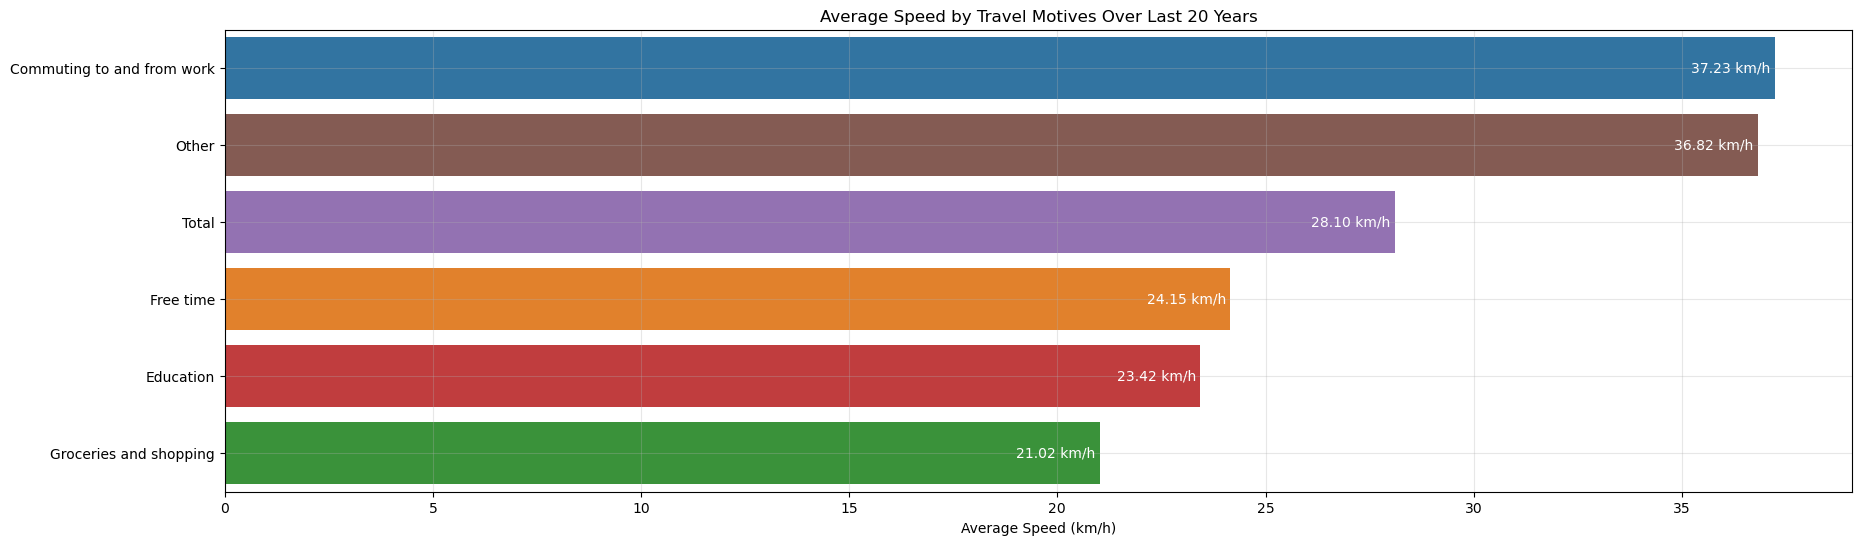

In [22]:

# Calculate the average speed by travel motive
average_speed = total.groupby('Travel motive')['Speed in kmh'].mean().sort_values(ascending=False)
# Define a color dictionary for each travel motive
color_map = {
    'Commuting to and from work': '#1f77b4',
    'Free time': '#ff7f0e',
    'Groceries and shopping': '#2ca02c',
    'Education': '#d62728',
    'Total': '#9467bd',
    'Other': '#8c564b'
}

# Prepare the data in a DataFrame format
average_speed_df = pd.DataFrame({
    'Travel motive': average_speed.index,
    'Average speed (km/h)': average_speed.values
})

# Set plot size
plt.figure(figsize=(21, 6))

# Create the bar plot with custom colors and specified order
sns.barplot(
    data=average_speed_df,
    y='Travel motive',
    x='Average speed (km/h)',
    palette=color_map
)

# Add value labels to the end of each bar
for index, value in enumerate(average_speed_df['Average speed (km/h)']):
    plt.text(
        value - 2, index,  # Position slightly to the left of the bar
        f'{value:.2f} km/h',  # Format value to 2 decimal places
        color='white',
        va='center'
    )

# Set the title and labels
plt.title('Average Speed by Travel Motives Over Last 20 Years')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('')
plt.grid(alpha=0.3)

# Save the plot as a PNG file
plt.savefig("average_speed_by_travel_motives.png", bbox_inches='tight')
# Show the plot
plt.show()

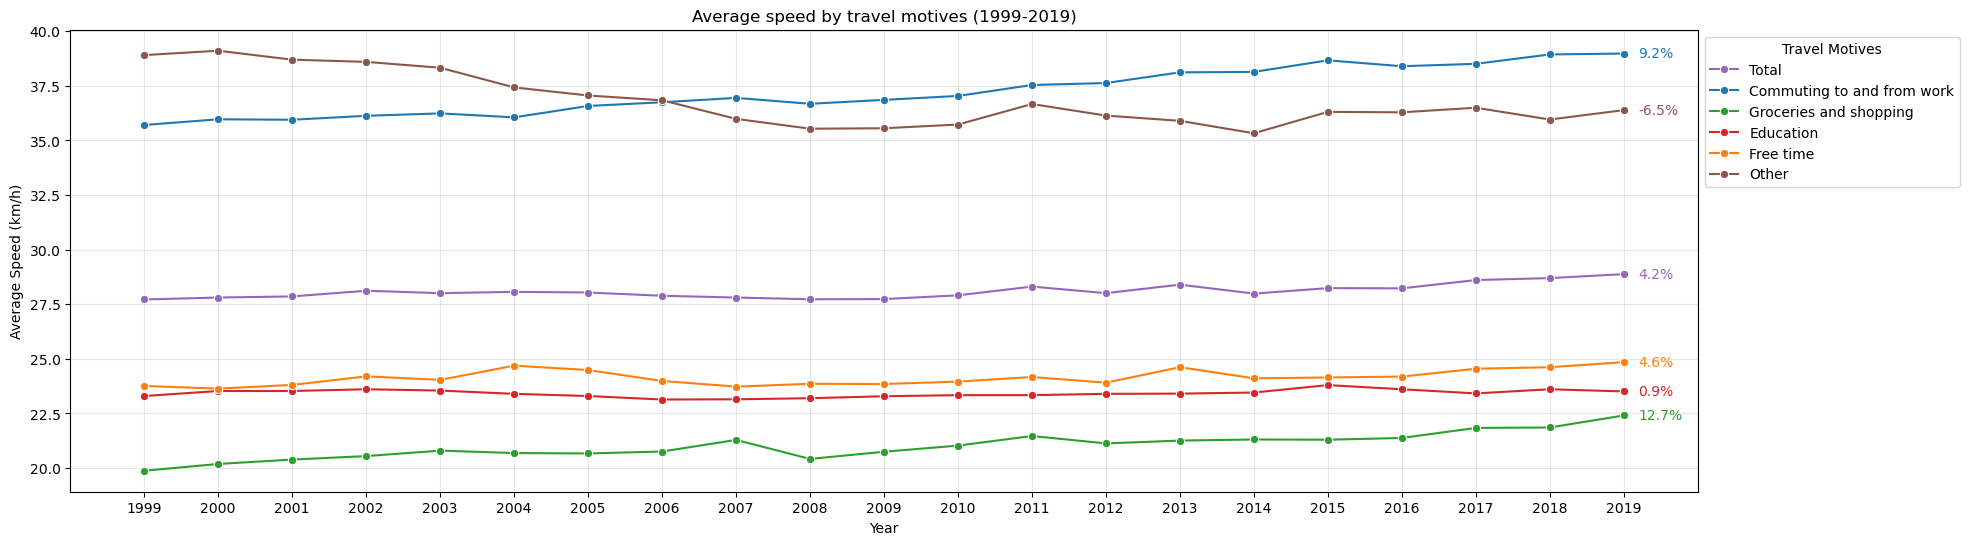

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize a dictionary to store percentage differences
percentage_diff = {}

# Calculate the average speed for each travel motive for 1999 and 2019
for motive in total['Travel motive'].unique():
    speed_1999 = total.loc[(total['Year'] == 1999) & (total['Travel motive'] == motive), 'Speed in kmh']
    speed_2019 = total.loc[(total['Year'] == 2019) & (total['Travel motive'] == motive), 'Speed in kmh']

    if not speed_1999.empty and not speed_2019.empty:
        speed_1999_value = speed_1999.values[0]
        speed_2019_value = speed_2019.values[0]
        
        # Calculate percentage difference
        if speed_1999_value != 0:  # Avoid division by zero
            percentage = ((speed_2019_value - speed_1999_value) / speed_1999_value) * 100
        else:
            percentage = float('inf')  # Handle case if initial speed is zero

        percentage_diff[motive] = percentage

# Set plot size
plt.figure(figsize=(21, 6))

# Create the line plot
sns.lineplot(
    data=total,
    x='Year',
    y='Speed in kmh',
    hue='Travel motive',
    palette=color_map,  # Use the same color map as before
    marker='o'  # Optional: adds markers at each data point
)

# Set the title and labels
plt.title('Average speed by travel motives (1999-2019)')
plt.xlabel('Year')
plt.ylabel('Average Speed (km/h)')

# Set proper x-ticks for years from 1999 to 2019
plt.xticks(range(1999, 2020))  # Set x-ticks to years from 1999 to 2019

# Add legend
plt.legend(title='Travel Motives', loc='upper left', bbox_to_anchor=(1, 1))

# Show grid for better readability
plt.grid(alpha=0.3)

# Annotate the percentage difference next to the lines
for motive, percentage in percentage_diff.items():
    if percentage is not None:  # Only annotate if percentage is available
        last_value = total.loc[total['Travel motive'] == motive].iloc[-1]['Speed in kmh']
        plt.text(
            2019 + 0.2,  # x-position slightly to the right of the last year
            last_value,  # y-position at the last value for that motive
            f'{percentage:.1f}%',  # Format percentage to one decimal place
            color=color_map[motive],  # Color matches the line color
            va='center'
        )

# Save the plot as a PNG file
plt.savefig("average_speed_by_travel_motives_line_plot_with_diff.png", bbox_inches='tight')

# Show the plot
plt.show()


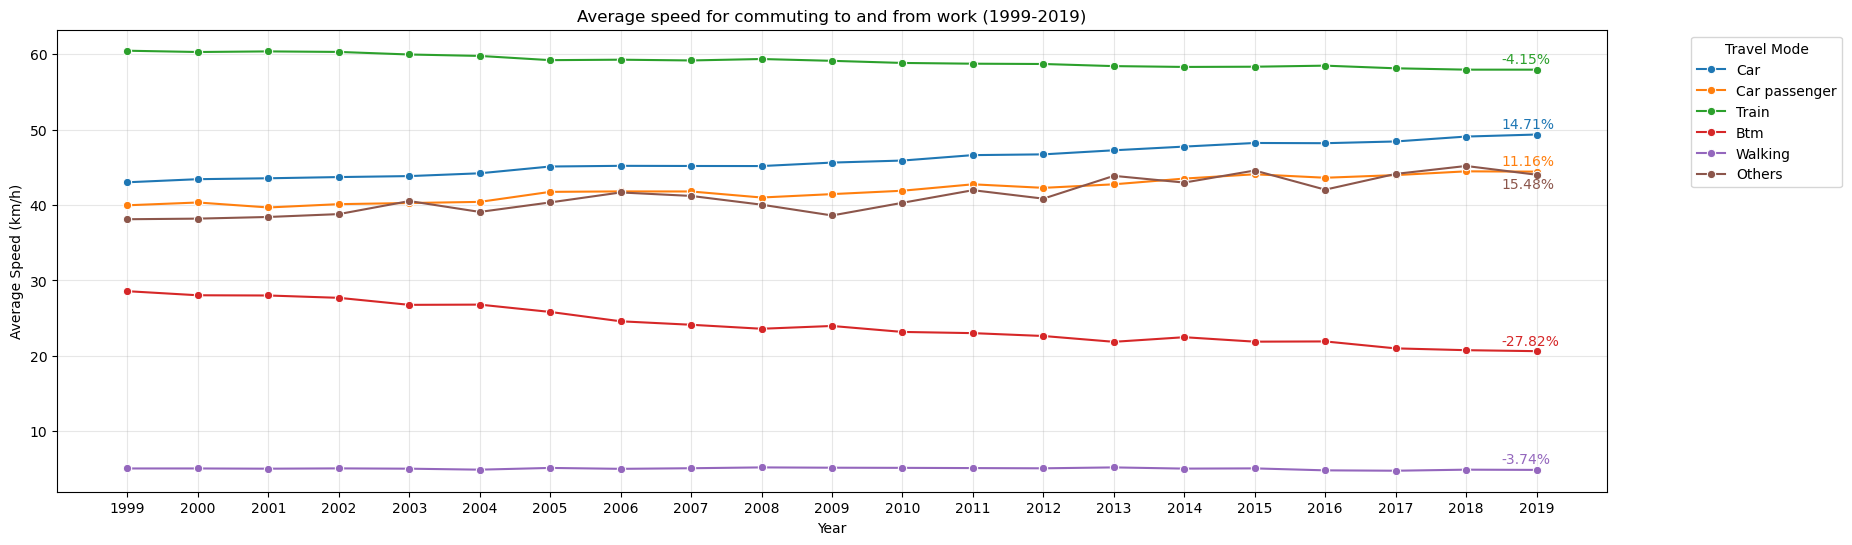

In [24]:
# Combine all the travel modes into a single DataFrame
combined_df = pd.concat([total, driver, passenger, train, btm, bike, walking, others], ignore_index=True)

# Filter for 'Commuting to and from work' and years from 1999 to 2019
filtered_df = combined_df[
    (combined_df['Travel motive'] == 'Commuting to and from work') &
    (combined_df['Year'].between(1999, 2019))
]

# Define a color palette for each travel mode
# Color map with specific color codes for each travel motive
color_palette = {
    'Car': '#1f77b4',            # Blue
    'Car passenger': '#ff7f0e',  # Orange
    'Train': '#2ca02c',          # Green
    'Btm': '#d62728',            # Red
    'Walking': '#9467bd',        # Purple
    'Others': '#8c564b'          # Brown
}

# Create the line plot
plt.figure(figsize=(20, 6))
lineplot = sns.lineplot(
    data=filtered_df,
    x='Year',
    y='Speed in kmh',
    hue='Travel mode',
    palette=color_palette,  # Use the defined color palette
    marker='o'  # Optional: adds markers at each data point
)

# Set the title and labels
plt.title('Average speed for commuting to and from work (1999-2019)')
plt.xlabel('Year')
plt.ylabel('Average Speed (km/h)')

# Set proper x-ticks for years from 1999 to 2019
plt.xticks(range(1999, 2020))  # This sets the x-ticks to be years from 1999 to 2019

# Iterate through each unique travel mode to calculate and annotate percentage differences
for travel_mode in filtered_df['Travel mode'].unique():
    mode_df = filtered_df[filtered_df['Travel mode'] == travel_mode]
    
    # Check if mode_df is empty
    if mode_df.empty:
        continue  # Skip to the next travel mode if there's no data

    speed_1999 = mode_df.loc[mode_df['Year'] == 1999, 'Speed in kmh'].mean()
    speed_2019 = mode_df.loc[mode_df['Year'] == 2019, 'Speed in kmh'].mean()

    if speed_1999 != 0:  # Avoid division by zero
        percent_diff = ((speed_2019 - speed_1999) / speed_1999) * 100
    else:
        percent_diff = None

    # Annotate the plot with the percentage difference for each travel mode
    if percent_diff is not None:
        # Check if the travel_mode is in the color_palette
        line_color = color_palette.get(travel_mode, 'black')  # Default to black if mode not found

        y_position = mode_df['Speed in kmh'].iloc[-1] + 0.8  # Default y position

        # If the travel mode is 'Others', adjust the y position for the annotation
        if travel_mode == 'Others':
            y_position = mode_df['Speed in kmh'].iloc[-1] - 1.8  # Use -0.8 instead of +0.5

        plt.text(
            2018.5,  # x position for the text (adjusted to the right)
            y_position,  # Use the adjusted y position
            f'{percent_diff:.2f}%',  # Format to 2 decimal places
            ha='left',  # Horizontal alignment
            color=line_color  # Use the same color as the line
        )

# Show the legend outside of the plot
plt.legend(title='Travel Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(alpha=0.3)

# Save the plot as a PNG file (optional)
plt.savefig("commuting_speed_work_with_differences.png", bbox_inches='tight')

# Show the plot
plt.show()


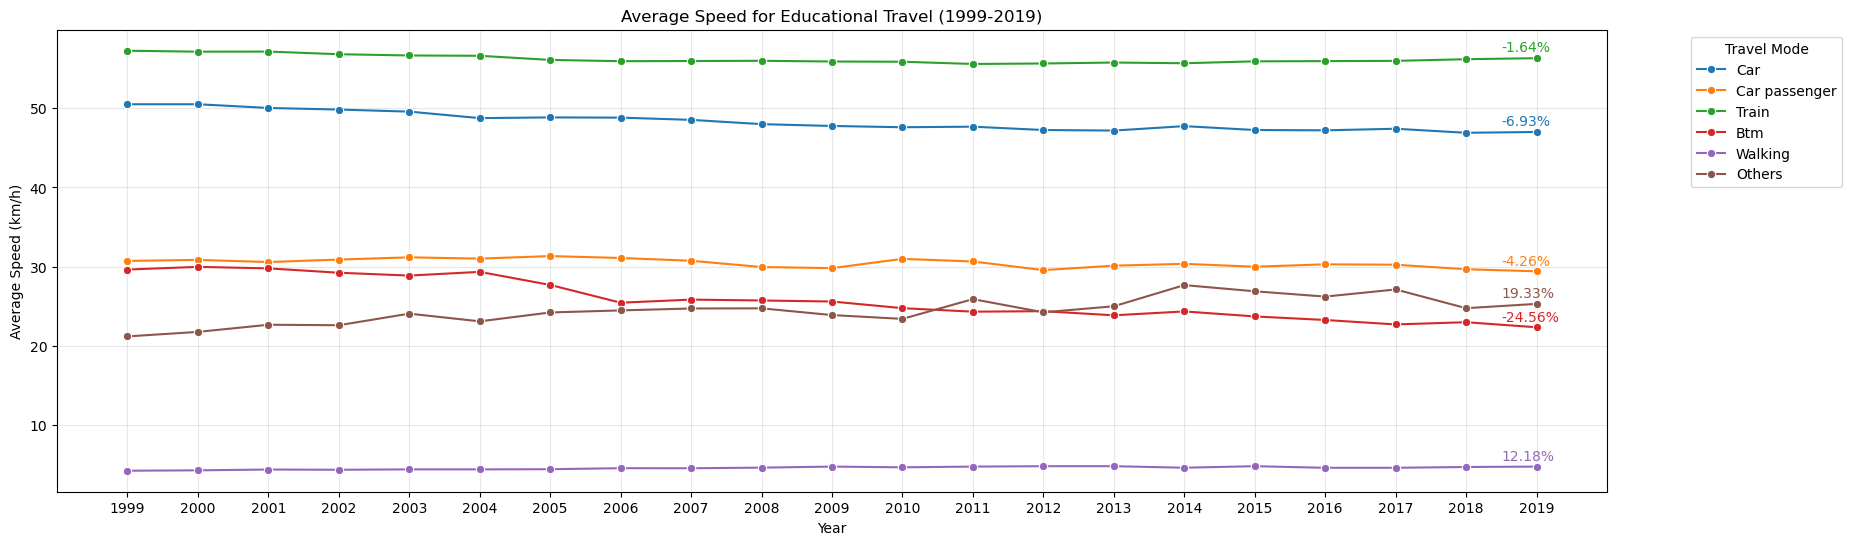

In [25]:
# Color map with specific color codes for each travel motive
color_palette = {
    'Car': '#1f77b4',            # Blue
    'Car passenger': '#ff7f0e',  # Orange
    'Train': '#2ca02c',          # Green
    'Btm': '#d62728',            # Red
    'Walking': '#9467bd',        # Purple
    'Others': '#8c564b'          # Brown
}

# Your previous code for reading and processing the data would be here

# Combine all the travel modes into a single DataFrame
combined_df = pd.concat([total, driver, passenger, train, btm, bike, walking, others], ignore_index=True)

# Filter for 'Education' and years from 1999 to 2019
filtered_df = combined_df[
    (combined_df['Travel motive'] == 'Education') &  # Change to Education
    (combined_df['Year'].between(1999, 2019))
]

# Create the line plot
plt.figure(figsize=(20, 6))
lineplot = sns.lineplot(
    data=filtered_df,
    x='Year',
    y='Speed in kmh',
    hue='Travel mode',
    palette=color_palette,  # Use the defined color palette with color codes
    marker='o'  # Optional: adds markers at each data point
)

# Set the title and labels
plt.title('Average Speed for Educational Travel (1999-2019)')  # Update title
plt.xlabel('Year')
plt.ylabel('Average Speed (km/h)')

# Set proper x-ticks for years from 1999 to 2019
plt.xticks(range(1999, 2020))  # This sets the x-ticks to be years from 1999 to 2019

# Iterate through each unique travel mode to calculate and annotate percentage differences
for travel_mode in filtered_df['Travel mode'].unique():
    mode_df = filtered_df[filtered_df['Travel mode'] == travel_mode]
    
    # Check if mode_df is empty
    if mode_df.empty:
        continue  # Skip to the next travel mode if there's no data

    speed_1999 = mode_df.loc[mode_df['Year'] == 1999, 'Speed in kmh'].mean()
    speed_2019 = mode_df.loc[mode_df['Year'] == 2019, 'Speed in kmh'].mean()

    if speed_1999 != 0:  # Avoid division by zero
        percent_diff = ((speed_2019 - speed_1999) / speed_1999) * 100
    else:
        percent_diff = None

    # Annotate the plot with the percentage difference for each travel mode
    if percent_diff is not None:
        # Check if the travel_mode is in the color_palette
        line_color = color_palette.get(travel_mode, 'black')  # Default to black if mode not found

        y_position = mode_df['Speed in kmh'].iloc[-1] + 0.8  # Default y position

        # If the travel mode is 'Others', adjust the y position for the annotation
        if travel_mode == 'Others':
            y_position = mode_df['Speed in kmh'].iloc[-1] + 0.8  # Use +0.8 instead of +0.5

        plt.text(
            2018.5,  # x position for the text (adjusted to the right)
            y_position,  # Use the adjusted y position
            f'{percent_diff:.2f}%',  # Format to 2 decimal places
            ha='left',  # Horizontal alignment
            color=line_color  # Use the same color as the line
        )

# Show the legend outside of the plot
plt.legend(title='Travel Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for better readability
plt.grid(alpha=0.3)

# Save the plot as a PNG file (optional)
plt.savefig("educational_travel_speed_with_differences.png", bbox_inches='tight')  # Update filename

# Show the plot
plt.show()
